# Example of optimizing a convex function

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform

In [2]:

param_dict = {
    'x': uniform(-5, 10),
    'y': uniform(-5, 10),
}

    
def objfunc(args_list):
    results = []
    for hyper_par in args_list:
        x = hyper_par['x']
        y = hyper_par['y']
        result = -500*(x**2 + y**2)
        results.append(result)
    return results

In [4]:
conf_Dict = dict()
conf_Dict['batch_size'] = 10
conf_Dict['num_iteration'] = 10
conf_Dict['domain_size'] = 10000

In [5]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
print('Tuner Configuration')
print(tuner.getConf())

Tuner Configuration
{'param_dict': {'x': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a17bbfeb8>, 'y': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a17bd1400>}, 'userObjective': <function objfunc at 0x1a17bc97b8>, 'domain_size': 10000, 'initial_random': 1, 'num_iteration': 10, 'objective': 'maximize', 'batch_size': 10}


In [6]:
results = tuner.maximize()

In [7]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x': -0.007615736761281688, 'y': -0.008560247603308646}
best objective: -0.06563864272354436


In [8]:
# Actual Opt Values
x_opt = 0
y_opt = 0

In [9]:
print("Real x_opt and y_opt are:",x_opt,y_opt)

Real x_opt and y_opt are: 0 0


# Actual variation in the objective

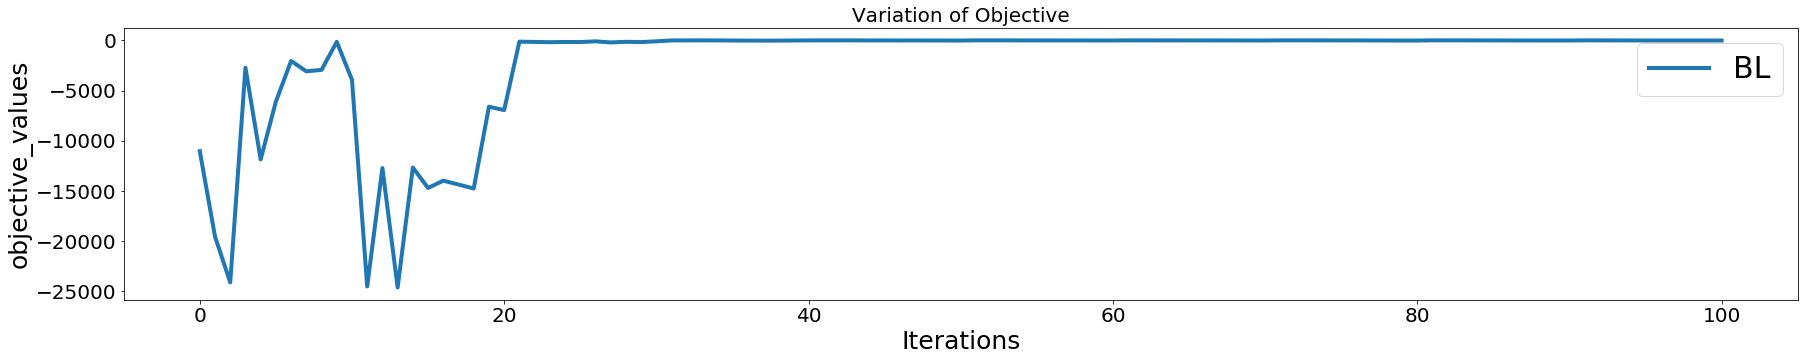

In [11]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation in the max objective

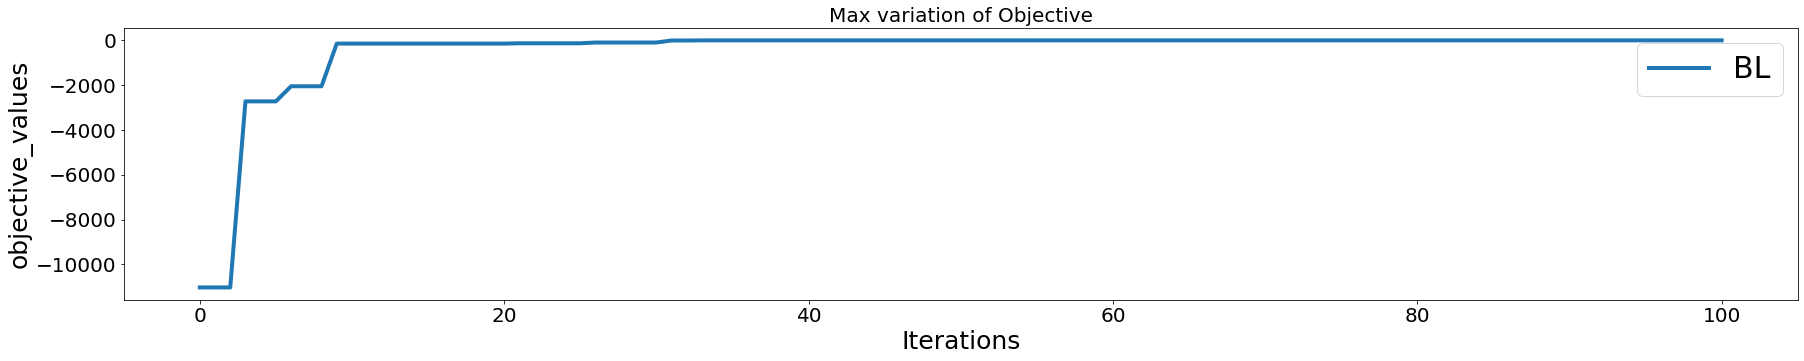

In [12]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the values tried

In [13]:
XY=[]
for par in results['params_tried']:
    x = par['x']
    y = par['y']
    XY.append([x,y])

In [14]:
XY= np.array(XY)

In [15]:
print(XY)

[[-3.91149211e+00 -2.60034768e+00]
 [ 4.25946042e+00  4.57389456e+00]
 [ 4.98287972e+00 -4.83334781e+00]
 [-5.18000551e-01  2.27575862e+00]
 [ 1.53180713e+00 -4.62203746e+00]
 [-3.49273269e+00  2.38985277e-02]
 [-7.63457341e-01 -1.87479450e+00]
 [-6.73214369e-01 -2.39059590e+00]
 [ 2.29852552e+00  7.69575713e-01]
 [ 2.43877708e-01  4.79056949e-01]
 [ 2.44778702e+00 -1.36690488e+00]
 [-4.92358028e+00  4.97467988e+00]
 [ 8.28005942e-01  4.97469523e+00]
 [-4.93244656e+00 -4.98723836e+00]
 [ 4.98500548e+00  6.87601104e-01]
 [-2.11429711e+00  4.99265890e+00]
 [-1.74464166e+00 -4.98891646e+00]
 [-4.92538527e+00  2.10982053e+00]
 [ 4.98010632e+00 -2.16902201e+00]
 [-2.68973497e+00  2.44551680e+00]
 [ 2.19348579e+00  3.01226676e+00]
 [ 3.92548862e-01  3.26614520e-01]
 [ 3.64703390e-01  4.24477325e-01]
 [ 4.83290131e-01  3.63687077e-01]
 [ 3.31429996e-01  4.60217007e-01]
 [ 5.02951190e-01  2.87004014e-01]
 [ 2.51042332e-01  3.63243176e-01]
 [ 4.69795159e-01  4.39000311e-01]
 [ 2.90518646e-01  4

In [16]:
print(np.sort(XY,axis=0))

[[-4.93244656e+00 -4.98891646e+00]
 [-4.92538527e+00 -4.98723836e+00]
 [-4.92358028e+00 -4.83334781e+00]
 [-3.91149211e+00 -4.62203746e+00]
 [-3.49273269e+00 -2.60034768e+00]
 [-2.68973497e+00 -2.39059590e+00]
 [-2.11429711e+00 -2.16902201e+00]
 [-1.74464166e+00 -1.87479450e+00]
 [-7.63457341e-01 -1.36690488e+00]
 [-6.73214369e-01 -1.93158942e-01]
 [-5.18000551e-01 -1.69588219e-01]
 [-1.91573938e-01 -1.57561378e-01]
 [-1.67494748e-01 -1.54070702e-01]
 [-1.57446118e-01 -1.47318666e-01]
 [-1.48062259e-01 -1.40766076e-01]
 [-1.42222618e-01 -1.39972752e-01]
 [-1.35792581e-01 -1.29401024e-01]
 [-1.09623182e-01 -1.27399988e-01]
 [-1.09568084e-01 -1.07607055e-01]
 [-9.34924750e-02 -1.02842252e-01]
 [-8.72432940e-02 -1.00498033e-01]
 [-7.75593919e-02 -8.54031879e-02]
 [-7.51600182e-02 -7.03845539e-02]
 [-7.22951004e-02 -6.62801477e-02]
 [-6.10580278e-02 -5.57847559e-02]
 [-5.27146696e-02 -4.87348240e-02]
 [-4.37893541e-02 -4.73455893e-02]
 [-4.22566499e-02 -4.14664689e-02]
 [-4.08950903e-02 -3

In [17]:
XY.shape

(101, 2)